# Volume 4: Lorenz Equations
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as FuncAnimation
from scipy.stats import linregress
import random
from IPython.display import HTML

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [2]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    
    sigma = 10
    rho = 28
    beta = 8/3
    
    dx = sigma * (x[1] - x[0])
    dy = rho * x[0] - x[1] - x[0] * x[2]
    dz = x[0] * x[1] - beta * x[2]
    
    return np.array([dx, dy, dz])

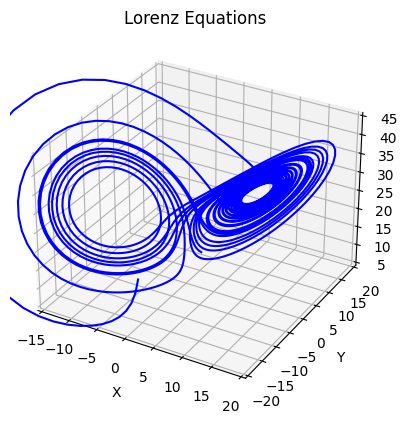

In [105]:
x0 = random.uniform(-15, 15)
y0 = random.uniform(-15, 15)
z0 = random.uniform(-15, 15)

# Time Span
t_span = (0,25)

# Intial Conditions
initial_values = np.array([x0, y0, z0])

# Solve the system
sol = solve_ivp(lorenz, t_span, initial_values, max_step = 0.01)

X, Y, Z = sol.y[0], sol.y[1], sol.y[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot(X,Y,Z, color = 'blue')
ax.set_title('Lorenz Equations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-15,20])
ax.set_ylim([-20, 20])  # Corrected 'set_ylimit' to 'set_ylim'
ax.set_zlim([5, 45]) 

plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

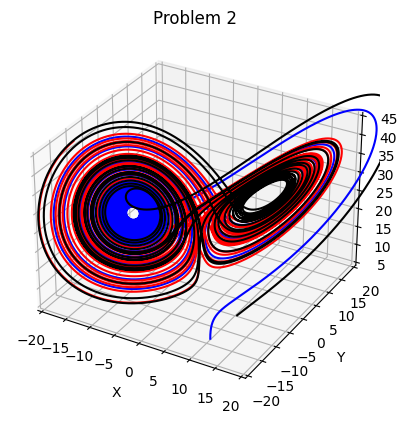

In [106]:
x_1, y_1, z_1  = random.uniform(-15,15), random.uniform(-15,15), random.uniform(-15,15)
x_2, y_2, z_2 = random.uniform(-15,15), random.uniform(-15,15), random.uniform(-15,15)
x_3, y_3, z_3 = random.uniform(-15,15), random.uniform(-15,15), random.uniform(-15,15)

# Time Span
t_span = (0,25)

# Initial Conditions
initial_values_1 = np.array([x_1, y_1, z_1])
initial_values_2 = np.array([x_2, y_2, z_2])
initial_values_3 = np.array([x_3, y_3, z_3])

# Solve the systems
sol_1 = solve_ivp(lorenz, t_span, initial_values_1, max_step = 0.001)
sol_2 = solve_ivp(lorenz, t_span, initial_values_2, max_step = 0.001)
sol_3 = solve_ivp(lorenz, t_span, initial_values_3, max_step = 0.001)

X1, Y1, Z1 = sol_1.y[0], sol_1.y[1], sol_1.y[2]
X2, Y2, Z2 = sol_2.y[0], sol_2.y[1], sol_2.y[2]
X3, Y3, Z3 = sol_3.y[0], sol_3.y[1], sol_3.y[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot(X1,Y1,Z1, color = 'blue')
ax.plot(X2, Y2, Z2, color = 'red')
ax.plot(X3, Y3, Z3, color = 'black')
ax.set_title('Problem 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_zlim([5,45])

plt.show()



## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4` and embed it into the notebook.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [113]:
# Initialze initial coonditions
x1, y1, z1 = np.random.uniform(-15,15), np.random.uniform(-15,15), np.random.uniform(-15,15)
x2, y2, z2 = x1 + np.random.randn() * (1e-8), y1 + np.random.randn() * (1e-8), z1 + np.random.randn() * (1e-8)

# Make time span
t_span = (0,50)
t = np.linspace(0,50,3000)

# Initial Conditions
ic_1 = np.array([x1, y1, z1])
ic_2 = np.array([x2, y2, z2])

# Solve solutions
solution_1 = solve_ivp(lorenz, t_span, ic_1, t_eval = t).y
solution_2 = solve_ivp(lorenz, t_span, ic_2, t_eval = t).y

# Set up the dimensions and features of the 3-D animation plot
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(5,45)
ax.set_title('Animation #3')

# Plot position of solutions
point_1, = ax.plot([], [], [], 'k', marker = 'o', label = "Original")
point_2, = ax.plot([], [], [], 'b', marker = 'o', label = 'Perturbation')

# Plot trajectory of solutions
traj_1, = ax.plot([],[],[], 'k-')
traj_2, = ax.plot([],[],[], 'b-')

# Create update function
def update(t):
    point_1.set_data_3d([solution_1[0,t]], [solution_1[1,t]], [solution_1[2,t]])
    point_2.set_data_3d([solution_2[0,t]], [solution_2[1,t]], [solution_2[2,t]])
    traj_1.set_data_3d(solution_1[0,:t+1], solution_1[ 1,:t+1], solution_1[2,:t+1])
    traj_2.set_data_3d(solution_2[0,:t+1], solution_2[1,:t+1], solution_2[2,:t+1])

    return point_1, traj_1, point_2, traj_2

ax.legend()

# Create and save animation
ani = FuncAnimation(fig, update, frames = range(0,3000,5), interval = 30)
plt.close(fig)
ani.save('lorenz_animation1.mp4')
plt.ioff()


# Render as html5 and embed
HTML(ani.to_html5_video())







## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4` and embed it into the notebook.

In [112]:
# Get starting conditions for x, y, z
x1, y1, z1 = random.uniform(-15,15), random.uniform(-15,15), random.uniform(-15,15)

# Get timespan 
t_span = (0,50)
t_linspace = np.linspace(0,50,3000)

# Initial Conditions
initial_conditions = np.array([x1, y1, z1])

# Solve solutions
solu_1 = solve_ivp(lorenz, t_span, initial_conditions, t_eval = t_linspace, atol = 1e-15, rtol = 1e-13).y
solu_2 = solve_ivp(lorenz, t_span, initial_conditions, t_eval = t_linspace, atol = 1e-12, rtol = 1e-10).y

# Set up the dimensions and features of the 3-D animation plot
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((-20,20))
ax.set_ylim((-20,20))
ax.set_zlim((5,45))
plt.title('Animation #4')

# Plot position of solutions
point_1, = ax.plot([], [], [], 'k', marker = 'o', label = "Sol. 1")
point_2, = ax.plot([], [], [], 'b', marker = 'o', label = "Sol. 2")

# Plot trajectory of solutions
traj_1, = ax.plot([],[],[], 'k-')
traj_2, = ax.plot([],[],[], 'b-')

# Create update function
def update(t):
    point_1.set_data_3d([solu_1[0,t]], [solu_1[1,t]], [solu_1[2,t]])
    point_2.set_data_3d([solu_2[0,t]], [solu_2[1,t]], [solu_2[2,t]])
    traj_1.set_data_3d(solu_1[0,:t+1], solu_1[1,:t+1], solu_1[2,:t+1])
    traj_2.set_data_3d(solu_2[0,:t+1], solu_2[1,:t+1], solu_2[2,:t+1])
    
ax.legend()

# Create and save animation
ani = FuncAnimation(fig, update, frames = range(0,3000,5), interval = 17)
ani.save('lorenz_animation2.mp4')
plt.ioff()

# Render as html5 and embed
HTML(ani.to_html5_video())
    


## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your approximation of $\lambda$, and produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

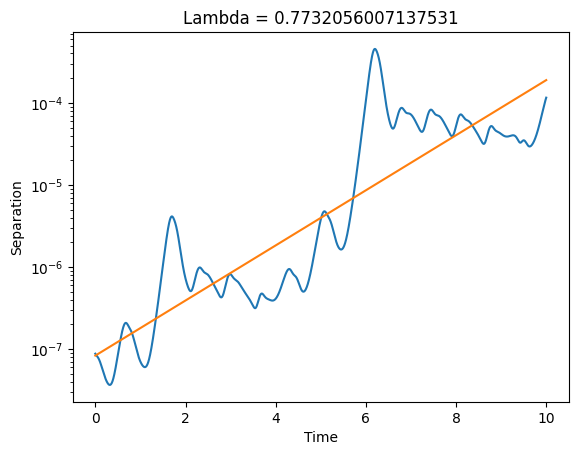

In [85]:
# Get random coordinates for normal and perturbed solution; initialze time
x_1, y_1, z_1  = random.uniform(-15,15), random.uniform(-15,15), random.uniform(-15,15)
x_2, y_2, z_2 = x_1+ random.uniform(-10,10) * (1e-8), y_1 + random.uniform(-10,10) * (1e-8), z_1 + random.uniform(-10,10) * (1e-8)
t_span = (0,5)

# Find starting value for normal solution
initial_values_1 = np.array([x_1, y_1, z_1])
sol_1 = solve_ivp(lorenz, t_span, initial_values_1, max_step = 0.001)
endpoint_x, endpoint_y, endpoint_z = sol_1.y[0], sol_1.y[1], sol_1.y[2]
orig_ic = (endpoint_x[-1], endpoint_y[-1], endpoint_z[-1])

# Find starting value for perturbed solution
initial_values_2 = np.array([x_2, y_2, z_2])
sol_2 = solve_ivp(lorenz, t_span, initial_values_2, max_step = 0.001)
perturb_x, perturb_y, perturb_z = sol_2.y[0], sol_2.y[1], sol_2.y[2]
perturb_ic = (perturb_x[-1], perturb_y[-1], perturb_z[-1])

# Initialze a new time interval
t_span_2 = (0,10)

# Find solutions to normal and perturbed starting conditions
sol_orig = solve_ivp(lorenz, t_span_2, orig_ic, max_step = 0.001)
sol_perturb = solve_ivp(lorenz, t_span_2, perturb_ic, max_step = 0.001)

# Get x,y,z coordinates
orig_x, orig_y, orig_z = sol_orig.y[0], sol_orig.y[1], sol_orig.y[2]
perturb_x, perturb_y, perturb_z = sol_perturb.y[0], sol_perturb.y[1], sol_perturb.y[2]

# Get difference between x,y,z coordinates
diff_x = orig_x - perturb_x
diff_y = orig_y - perturb_y
diff_z = orig_z - perturb_z

# Find the norm between x,y,z coordinates
norm_diff = np.sqrt(diff_x**2 + diff_y**2 + diff_z**2)

# Make timeline
t_linspace = np.linspace(0,10, len(norm_diff))

# Solve linear regression to get slope and y_intercept
regression = linregress(t_linspace, np.log(norm_diff))
a, b = regression[0], regression[1]


# Plot data
plt.semilogy(t_linspace, norm_diff)
plt.semilogy(t_linspace, np.exp(a*t_linspace +b))
plt.xlabel('Time')
plt.ylabel('Separation')
plt.title(f'Lambda = {a}')
plt.show()

